In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, cross_validate
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import make_scorer, get_scorer

In [2]:
df = pd.read_csv(r"..\oblig3\abalone.data", sep=",", names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
df['Sex'] = pd.Series(LabelEncoder().fit_transform(df['Sex']))

In [4]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64


<Axes: xlabel='Rings'>

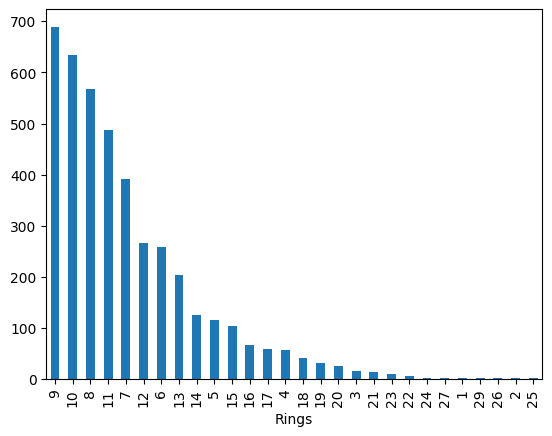

In [7]:
print(df['Rings'].value_counts())
df['Rings'].value_counts().plot.bar()

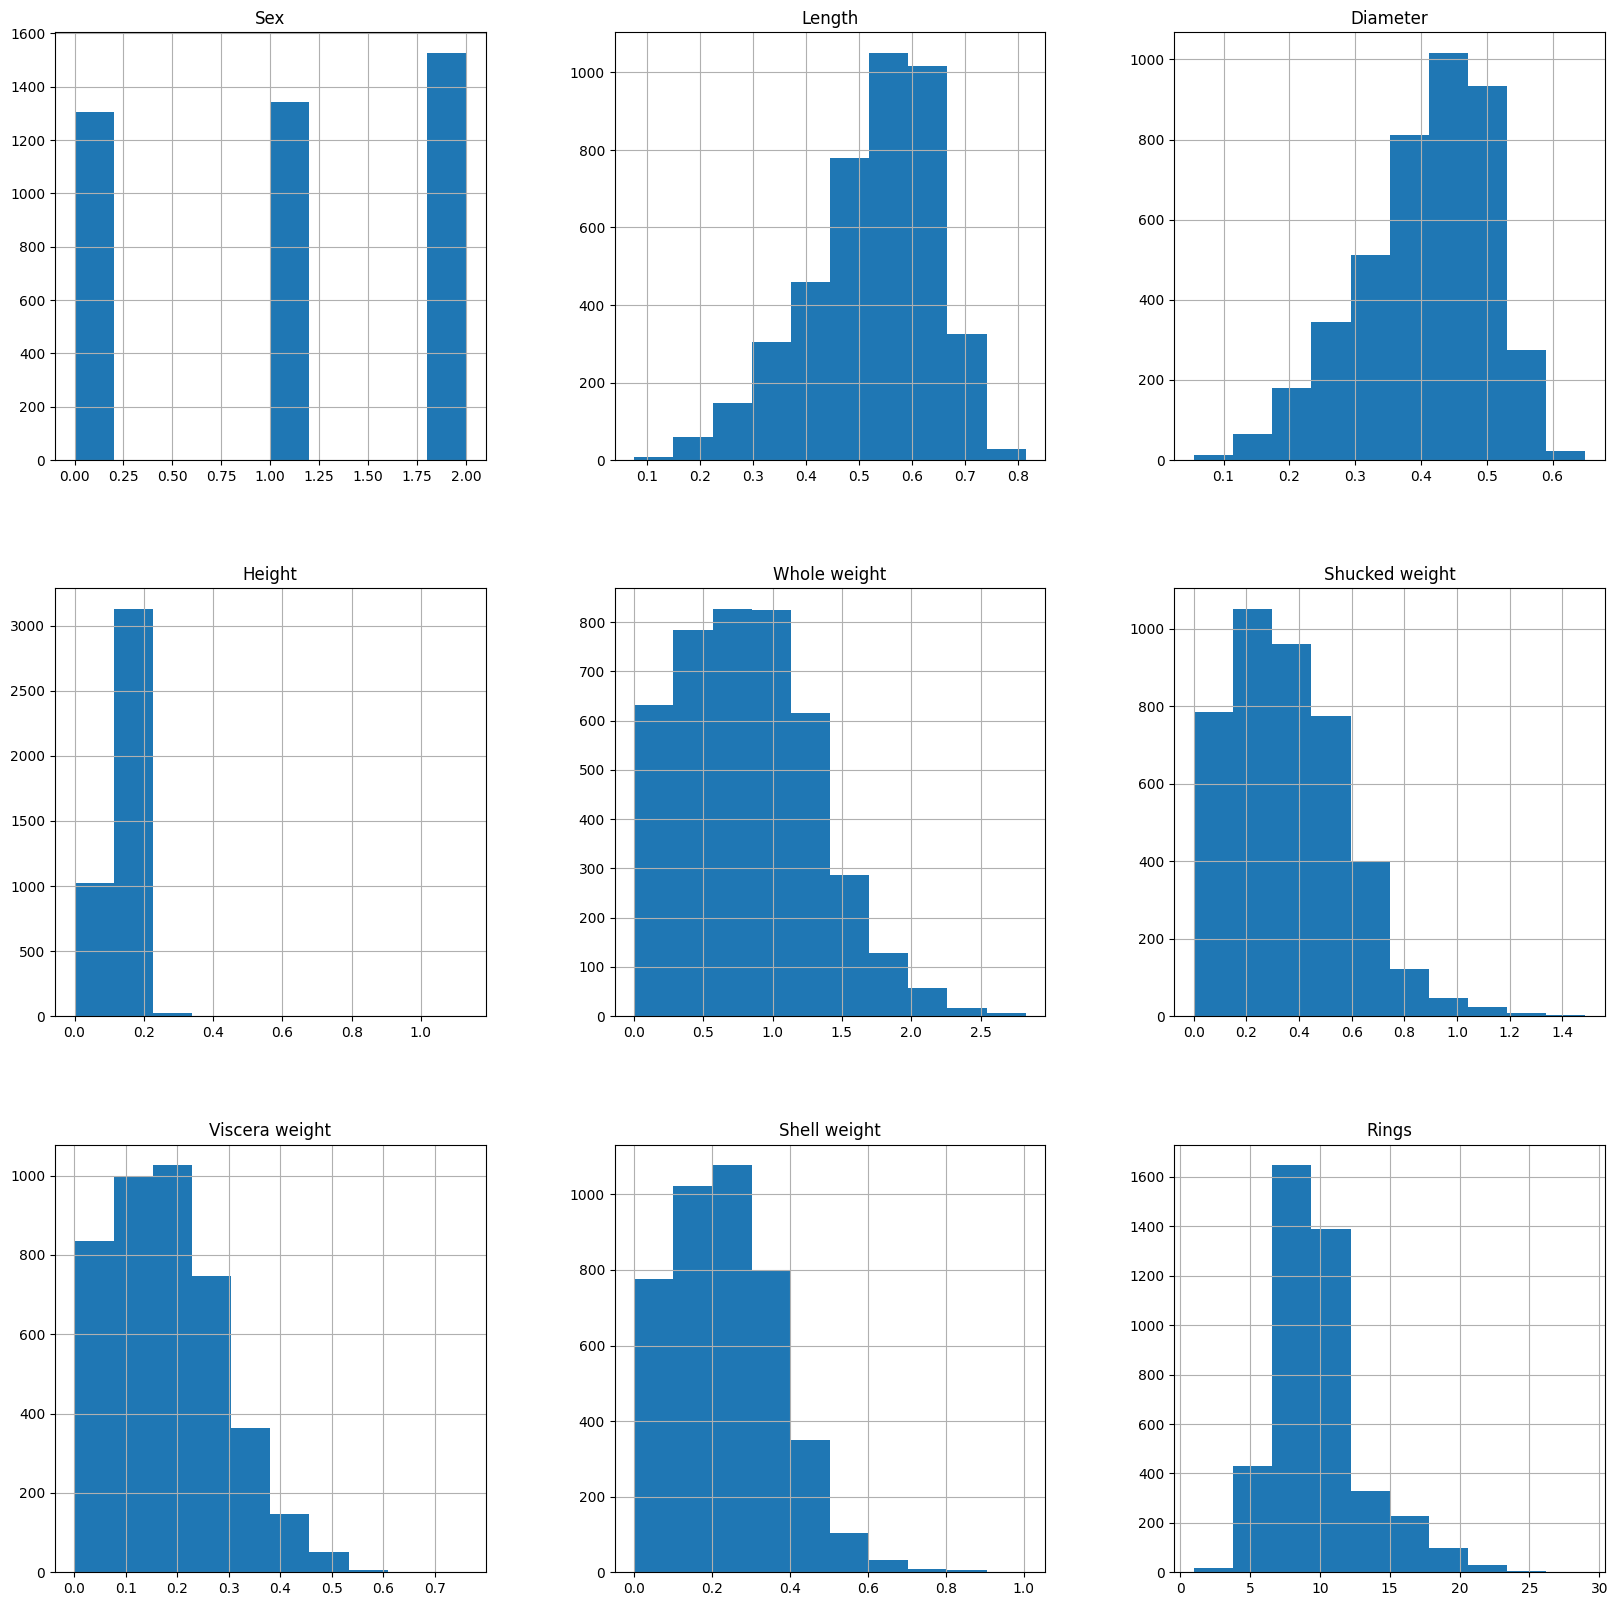

In [8]:
df.hist(figsize=(20,20))
plt.show()

In [9]:
df_features = pd.DataFrame(StandardScaler().fit_transform(df.drop('Rings', axis=1)), columns=df.drop('Rings', axis=1).columns)
df_targets = df['Rings']

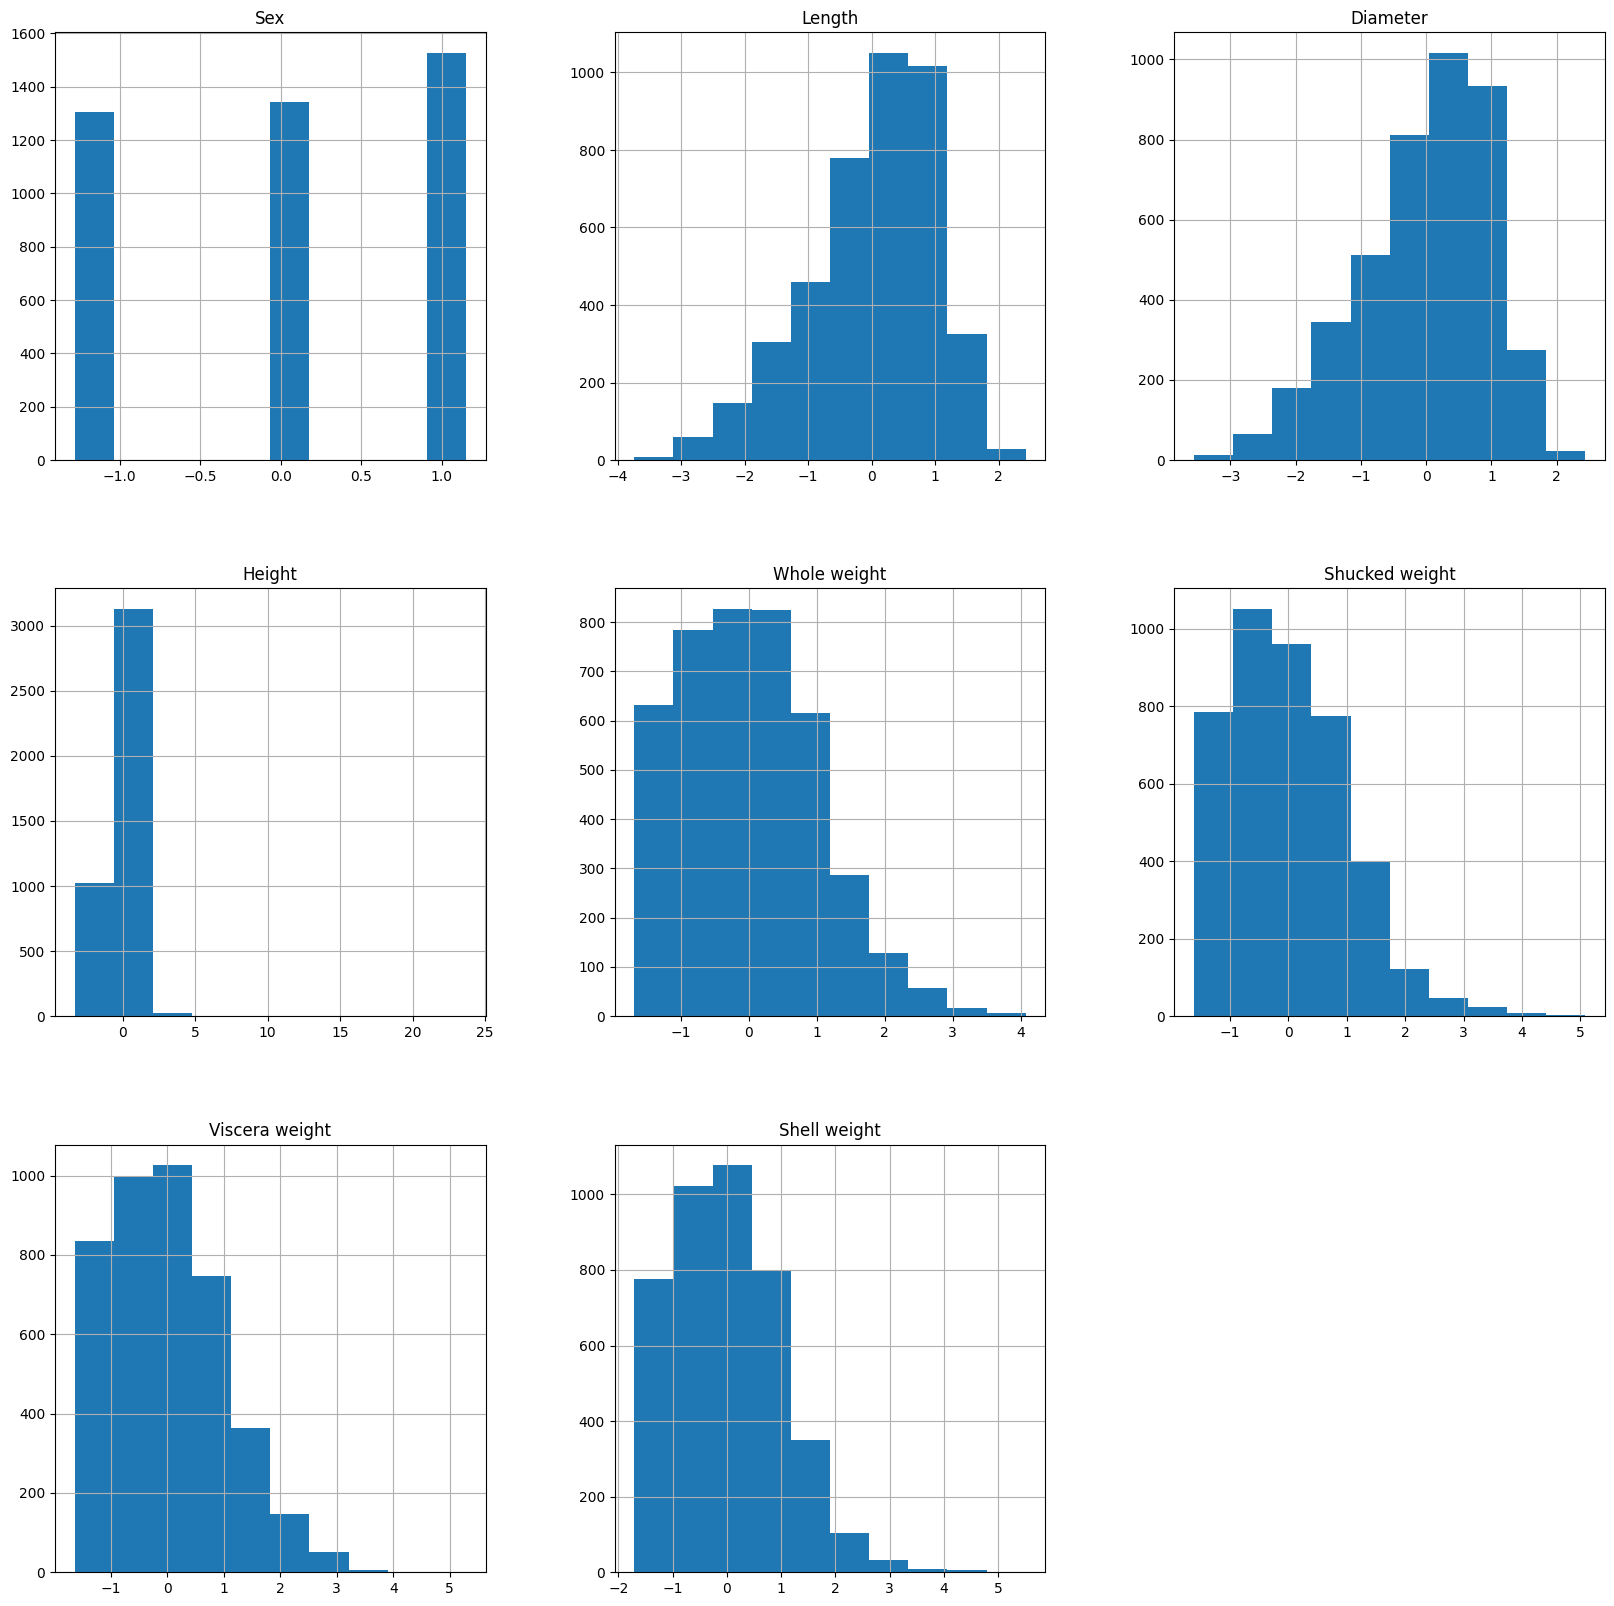

In [10]:
df_features.hist(figsize=(20,20))
plt.show()

<Axes: >

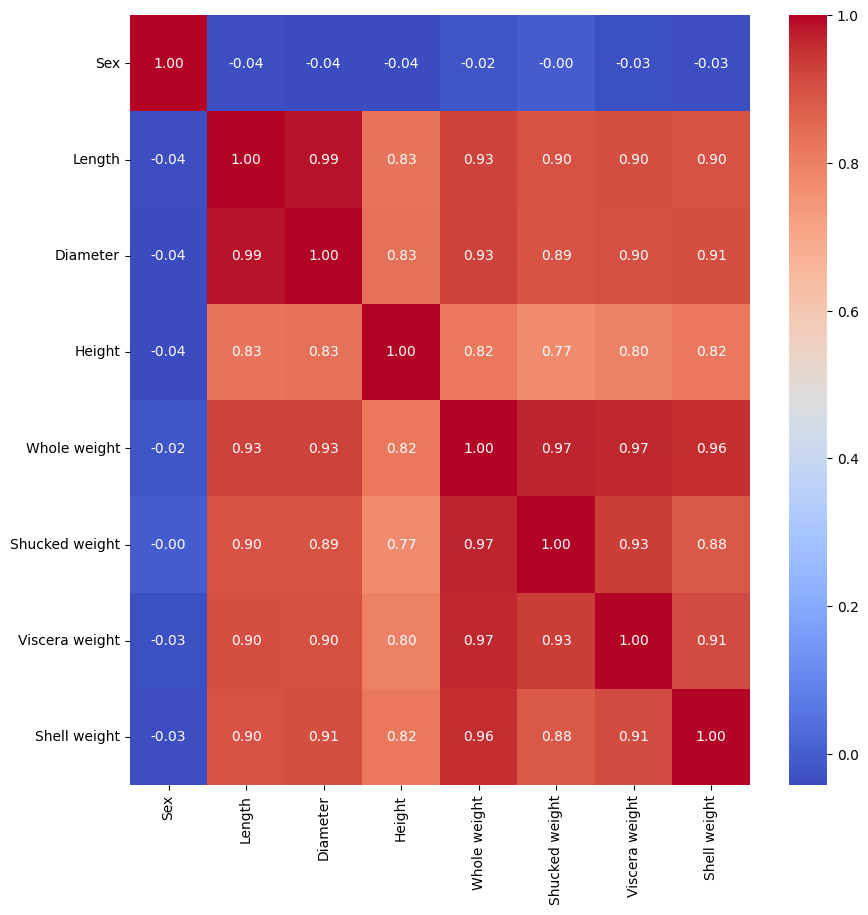

In [11]:
df_correlation = df_features.corr()
plt.figure(figsize=(10,10))
sb.heatmap(df_correlation, annot=True, cmap="coolwarm", fmt=".2f")

In [12]:
features_pca3 = pd.DataFrame(PCA(n_components=3).fit_transform(df_features))
features_pca4 = pd.DataFrame(PCA(n_components=4).fit_transform(df_features))
features_pca5 = pd.DataFrame(PCA(n_components=5).fit_transform(df_features))
features_pca6 = pd.DataFrame(PCA(n_components=6).fit_transform(df_features))
features_pca7 = pd.DataFrame(PCA(n_components=7).fit_transform(df_features))

In [35]:
print(cross_val_score(RandomForestRegressor(), X=features_pca3, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(RandomForestRegressor(), X=features_pca4, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(RandomForestRegressor(), X=features_pca5, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(RandomForestRegressor(), X=features_pca6, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(RandomForestRegressor(), X=features_pca7, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(RandomForestRegressor(), X=df_features, y=df_targets, cv=5, scoring="r2"))

[ 0.2882437  -0.15351208  0.41863962  0.38744932  0.36912824]
[ 0.29612283 -0.08839285  0.42308876  0.41287506  0.36069531]
[0.41828493 0.261914   0.51965887 0.52966243 0.48134816]
[0.42002447 0.25045626 0.52037285 0.53483533 0.47791458]
[0.43063655 0.26776136 0.52262167 0.54370484 0.4844307 ]
[0.44275602 0.26244983 0.51386368 0.53357823 0.45672957]


In [34]:
print(cross_val_score(Ridge(), X=features_pca3, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(Ridge(), X=features_pca4, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(Ridge(), X=features_pca5, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(Ridge(), X=features_pca6, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(Ridge(), X=features_pca7, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(Ridge(), X=df_features, y=df_targets, cv=5, scoring="r2"))

[ 0.15551378 -0.1714612   0.13591704  0.38601207  0.32386789]
[ 0.16095188 -0.18630862  0.153574    0.38146791  0.32308258]
[0.36689005 0.16140388 0.44935578 0.51993572 0.404043  ]
[0.37590973 0.16215297 0.46193438 0.51477396 0.41248921]
[0.37818621 0.16133358 0.46331379 0.5174333  0.40999632]
[0.40963627 0.16024993 0.48036604 0.5071757  0.43676266]


In [33]:
print(cross_val_score(Lasso(), X=features_pca3, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(Lasso(), X=features_pca4, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(Lasso(), X=features_pca5, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(Lasso(), X=features_pca6, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(Lasso(), X=features_pca7, y=df_targets, cv=5, scoring="r2"))
print(cross_val_score(Lasso(), X=df_features, y=df_targets, cv=5, scoring="r2"))

[ 0.05173261 -0.20007928  0.26762185  0.31734896  0.27027801]
[ 0.05173261 -0.20007928  0.26762185  0.31734896  0.27027801]
[ 0.05173261 -0.20007928  0.26762185  0.31734896  0.27027801]
[ 0.05173261 -0.20007928  0.26762185  0.31734896  0.27027801]
[ 0.05173261 -0.20007928  0.26762185  0.31734896  0.27027801]
[ 0.03188796 -0.11637453  0.26475305  0.33408326  0.27076925]


In [13]:
global_random_state = 15

scoring = {
    'mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': get_scorer('r2'),
}  

def evaluate(estimator, X, y):
    scores = {}
    for (name,scorer) in scoring.items():
        scores[name] = scorer(estimator, X, y) 
    return scores

def train(features, targets, estimator, params, scoring=scoring, refit='r2', random_state=global_random_state, outer_splits=5, inner_splits=4):

    outer_cv = StratifiedKFold(n_splits=outer_splits, shuffle=True, random_state=global_random_state)
    inner_cv = StratifiedKFold(n_splits=inner_splits, shuffle=True, random_state=global_random_state)

    scores_train = []
    scores_test = []
    estimators = []
    cv_results = []

    # Loop through all test folds
    for (train_index, test_index) in outer_cv.split(features, targets):
        
        grid = GridSearchCV(
            estimator,
            params, 
            scoring=scoring, 
            refit=refit,
            error_score='raise', 
            cv=inner_cv)
        grid.fit(features.iloc[train_index], targets.iloc[train_index])        
        
        evaluation_train = evaluate(grid, features.iloc[train_index], targets.iloc[train_index])
        evaluation_test = evaluate(grid, features.iloc[test_index], targets.iloc[test_index])
        
        scores_train.append(evaluation_train)
        scores_test.append(evaluation_test)
        
        estimators.append(grid.best_estimator_)
        cv_results.append(pd.DataFrame(grid.cv_results_))
        print("*")

    return estimators, pd.DataFrame(scores_train), pd.DataFrame(scores_test), pd.concat(cv_results, names=['test_split'], keys=range(outer_splits))

In [ ]:
rf_params = {
    'max_depth': [6, 8, 12, 18, 24, 30],
    'min_samples_split': [18,22,24,26,30],
    'criterion': ['poisson'], #, 'absolute_error', 'squared_error', 'friedman_mse'
    'n_estimators': [150] #125,, 175
}
rf_estimators, rf_scores_train, rf_scores_test, rf_cv_results = train(df_features, df_targets,
    RandomForestRegressor(random_state=global_random_state),
    rf_params, outer_splits=4, inner_splits=2)

c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


*


<Axes: xlabel='param_n_estimators', ylabel='mean_test_r2'>

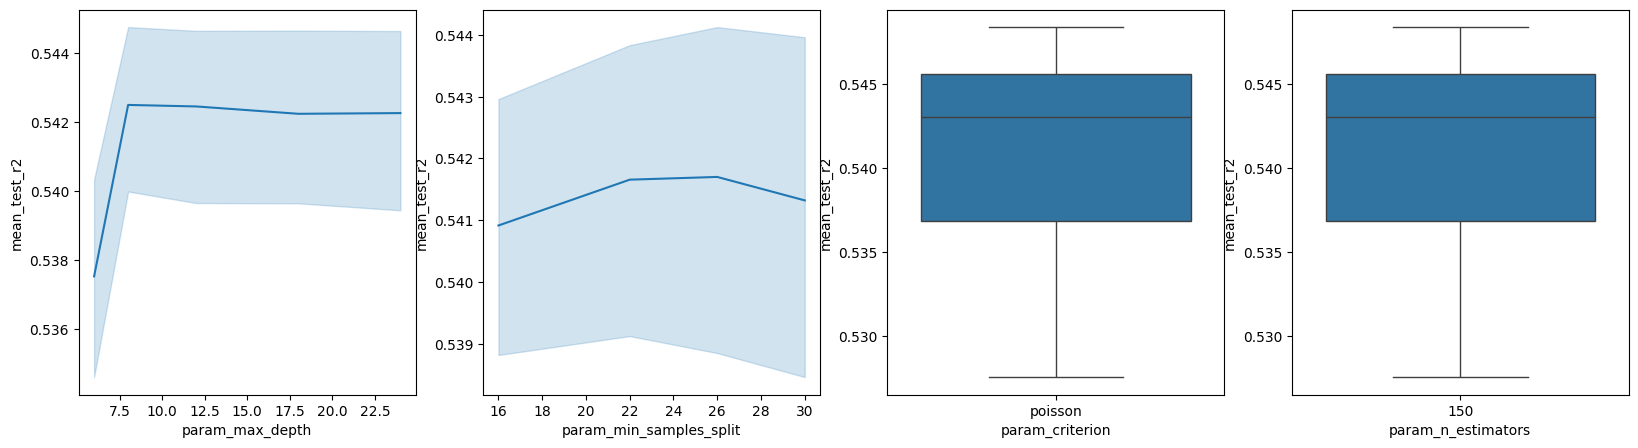

In [19]:
fig, ax = plt.subplots(1,4, figsize=(20,5))
sb.lineplot(data=rf_cv_results, x='param_max_depth', y='mean_test_r2', ax=ax[0])
sb.lineplot(data=rf_cv_results, x='param_min_samples_split', y='mean_test_r2', ax=ax[1])
sb.boxplot(data=rf_cv_results, x='param_criterion', y='mean_test_r2', ax=ax[2])
sb.boxplot(data=rf_cv_results, x='param_n_estimators', y='mean_test_r2', ax=ax[3])

In [21]:
rf_estimators

[RandomForestRegressor(criterion='poisson', max_depth=8, min_samples_split=16,
                       n_estimators=150, random_state=15),
 RandomForestRegressor(criterion='poisson', max_depth=8, min_samples_split=30,
                       n_estimators=150, random_state=15),
 RandomForestRegressor(criterion='poisson', max_depth=12, min_samples_split=26,
                       n_estimators=150, random_state=15),
 RandomForestRegressor(criterion='poisson', max_depth=24, min_samples_split=26,
                       n_estimators=150, random_state=15)]

In [23]:
rf_scores_test.describe()

,mean_absolute_error,mean_squared_error,r2
count,4.000000,4.000000,4.000000
mean,-1.514779,-4.646142,0.552881
std,0.019769,0.094071,0.009199
min,-1.535101,-4.729371,0.539190
25%,-1.530048,-4.717812,0.551944
50%,-1.513175,-4.663545,0.556685
75%,-1.497906,-4.591875,0.557622
max,-1.497665,-4.528108,0.558964


In [32]:
ridge_params = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], #'lbfgs'
    'max_iter': [1000, 5000, 10000],
}
ridge_estimators, ridge_scores_train, ridge_scores_test, ridge_cv_results = train(df_features, df_targets,
    Ridge(random_state=global_random_state),
    ridge_params)

c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


*


<Axes: xlabel='param_max_iter', ylabel='mean_test_r2'>

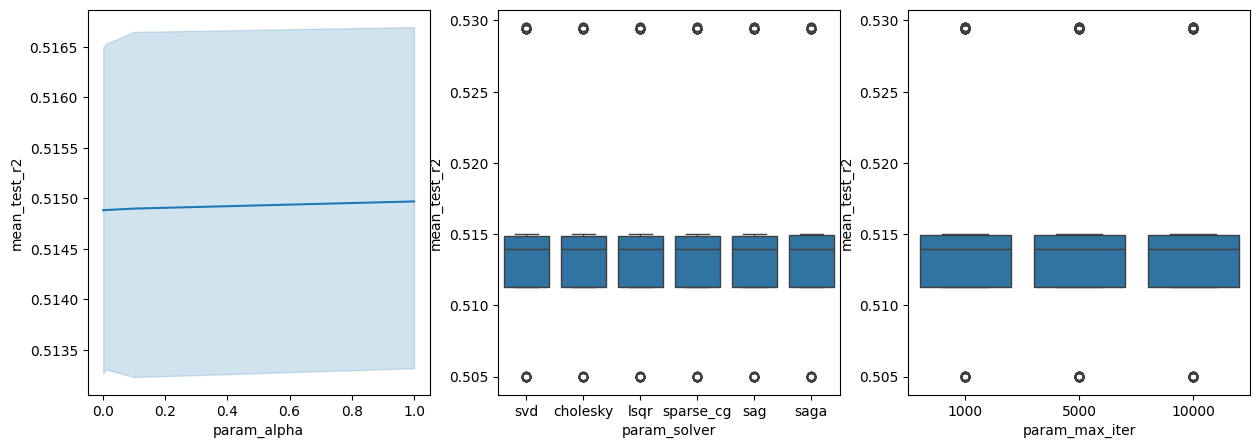

In [29]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sb.lineplot(data=ridge_cv_results, x='param_alpha', y='mean_test_r2', ax=ax[0])
sb.boxplot(data=ridge_cv_results, x='param_solver', y='mean_test_r2', ax=ax[1])
sb.boxplot(data=ridge_cv_results, x='param_max_iter', y='mean_test_r2', ax=ax[2])

In [30]:
ridge_scores_test

,mean_absolute_error,mean_squared_error,r2
0,-1.617295,-5.032346,0.531106
1,-1.553428,-4.568468,0.556505
2,-1.633944,-4.918445,0.520810
3,-1.626880,-5.038261,0.516263
4,-1.642323,-5.506915,0.462732


In [31]:
ridge_estimators

[Ridge(alpha=0.001, max_iter=1000, random_state=15, solver='sparse_cg'),
 Ridge(alpha=1, max_iter=1000, random_state=15, solver='saga'),
 Ridge(alpha=1, max_iter=1000, random_state=15, solver='saga'),
 Ridge(alpha=1, max_iter=1000, random_state=15, solver='saga'),
 Ridge(alpha=1, max_iter=1000, random_state=15, solver='sag')]

In [15]:
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1],
    'max_iter': [1000, 5000, 10000],
}
lasso_estimators, lasso_scores_train, lasso_scores_test, lasso_cv_results = train(df_features, df_targets,
    Lasso(random_state=global_random_state),
    lasso_params, outer_splits=4, inner_splits=3)

c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


*


c:\Users\hallo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


*


<Axes: xlabel='param_max_iter', ylabel='mean_test_r2'>

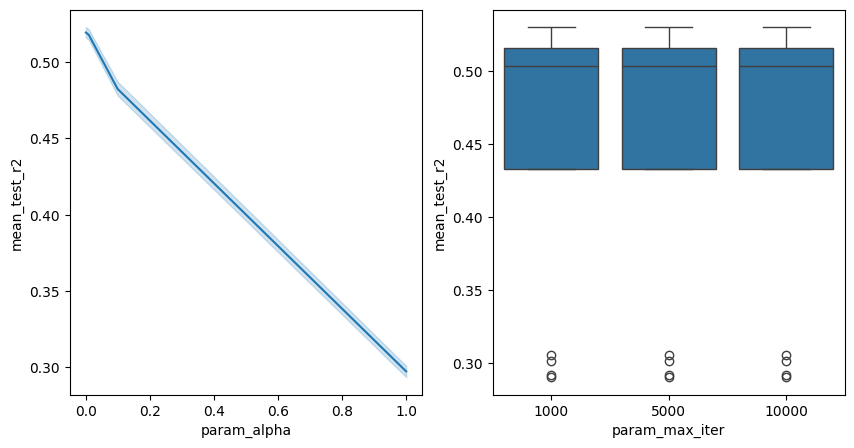

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sb.lineplot(data=lasso_cv_results, x='param_alpha', y='mean_test_r2', ax=ax[0])
#sb.boxplot(data=lasso_cv_results, x='param_solver', y='mean_test_r2', ax=ax[1])
sb.boxplot(data=lasso_cv_results, x='param_max_iter', y='mean_test_r2', ax=ax[1])